In [35]:
# Imoprt necessery libraries to perform EDA and data analysis
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Read CSV files for each country
benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)

Data Understanding

To perform any analysis we shall first understand our data and then chose which data and method to use for analysis.

In [37]:
# to see the overview of the data
print("Data Overview")
print("----------------")

# Print the first few rows of each dataframe
print("Benin Data overview:")
print(df_benin.head())
print("\n")
print("Benin Data shape:", df_benin.shape)
print("Togo Data overview:")
print(df_togo.head())
print("Togo Data shape:", df_togo.shape)
print("\n")
print("Sierra Leone Data overview:")
print(df_sierraleone.head())
print("Sierra Leone:", df_sierraleone.shape)   
print("\n")



Data Overview
----------------
Benin Data overview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       Na

In [38]:
# to see the data types and additional information of each data
print("For Benin Data:")
df_benin.info()
print("\n")
print("For Togo Data:")
df_togo.info()
print("\n")
print("For Sierra Leone Data:")
df_sierraleone.info()
 

For Benin Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB        

Summary Statistics:
 Lets now Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand each data distribution.

In [39]:
# to caculate the statistical measures first we need to identify numeric columns and execlude non-numeric columns from our list of columns
columns_to_exclude = ['Timestamp', 'Cleaning', 'Comments']
columns_to_exclude_for_mode = ['Timestamp', 'Comments']

In [40]:
#the exclude those non numerical coulmns
df_benin_filtered = df_benin.drop(columns= columns_to_exclude)
df_togo_filtered = df_togo.drop(columns= columns_to_exclude)
df_sierraleone_filtered = df_sierraleone.drop(columns= columns_to_exclude)
df_benin_mode_filtered = df_benin.drop(columns = columns_to_exclude_for_mode)
df_togo_filtered = df_togo.drop(columns = columns_to_exclude_for_mode)
df_sierraleone_filtered = df_sierraleone.drop(columns = columns_to_exclude_for_mode)

In [41]:
# Calculate statistical measures for the Benin filtered DataFrame
benin_statis = df_benin_filtered.describe()

# Calculate statistical measures for the Togo filtered DataFrame
togo_statis = df_togo_filtered.describe()

# Calculate statistical measures for the Sierra Leone filtered DataFrame
sierraleone_statis = df_sierraleone_filtered.describe()

# Calculate statistical measures for the Benin mode filtered DataFrame
benin_mode_statis = df_benin_mode_filtered.describe()

# Calculate statistical measures for the Togo mode filtered DataFrame
togo_mode_statis = df_togo_filtered.describe()

# Calculate statistical measures for the Sierra Leone mode filtered DataFrame
sierraleone_mode_statis = df_sierraleone_filtered.describe()

# To include additional statistics - mode 
benin_mode = df_benin_mode_filtered.mode()
togo_mode = df_togo_filtered.mode()
sierraleone_mode = df_sierraleone_filtered.mode()

# To display results for each data:
print("Benin data statistical measures:\n", benin_statis)
print("\n")
print("Benin data Mode:\n", benin_mode)
print("\n")
print("Togo data statistical measures:\n", togo_statis)
print("\n")
print("Togo data Mode:\n", togo_mode)
print("\n")
print("Sierra Leone data statistical measures:\n", sierraleone_statis)
print("\n")
print("Sierra Leone data Mode:\n", sierraleone_mode)


Benin data statistical measures:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   

Data Quality Check:
To perform data uality lets look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).

In [42]:
#look for missing values
# List of columns to check for missing values
columns_to_check_miising = ['GHI','DNI','DHI']

# Check for missing values in these columns
missing_values = df_benin[columns_to_check_miising].isnull().sum()

# Print missing values for these specific columns
print("\nMissing values in GHI, DNI, DHI:\n", missing_values)


Missing values in GHI, DNI, DHI:
 GHI    0
DNI    0
DHI    0
dtype: int64


In [43]:
# Check for negative values specifically in GHI, DNI, and DHI columns
negative_values = df_benin[['GHI', 'DNI', 'DHI']].lt(0).sum()

# Print count of negative values for each of these columns
print("\nCount of Negative values in GHI, DNI, DHI:\n", negative_values)



Count of Negative values in GHI, DNI, DHI:
 GHI    258847
DNI    275987
DHI    259182
dtype: int64


In [44]:
# Function to detect outliers using IQR

def detect_outliers_iqr(df, columns):
    """
    Detect outliers in specified columns of a DataFrame using the IQR method.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names to check for outliers.

    Returns:
    dict: A dictionary with the column names as keys and the number of outliers as values.
    """
    outliers = {}
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1, Q3 = np.percentile(df[col], [25, 75])
        # Calculate IQR
        IQR = Q3 - Q1
        # Determine outlier criteria
        outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        # Store the count of outliers
        outliers[col] = outlier_mask.sum()
    return outliers

# List of columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Call the function and get the outliers
outliers_count_benin = detect_outliers_iqr(df_benin, columns_to_check)
outliers_count_togo = detect_outliers_iqr(df_togo, columns_to_check)
outliers_count_sierraleone = detect_outliers_iqr(df_sierraleone, columns_to_check)
# Print the results for each data
print("Outliers count per column for Benin:")
for col, count in outliers_count_benin.items():
    print(f"{col}: {count}")
print("\n")
print("Outliers count per column for Togo:")
for col, count in outliers_count_togo.items():
    print(f"{col}: {count}")
print("\n")
print("Outliers count per column for Sierra Leone:")
for col, count in outliers_count_sierraleone.items():
    print(f"{col}: {count}")


Outliers count per column for Benin:
GHI: 145
DNI: 15196
DHI: 8733
ModA: 98
ModB: 240
WS: 6717
WSgust: 5368


Outliers count per column for Togo:
GHI: 15853
DNI: 101688
DHI: 4407
ModA: 21017
ModB: 20613
WS: 3169
WSgust: 3665


Outliers count per column for Sierra Leone:
GHI: 1303
DNI: 50586
DHI: 7905
ModA: 1237
ModB: 1537
WS: 8708
WSgust: 7377


Time Series Analysis:
Now lets plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\1211700551.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


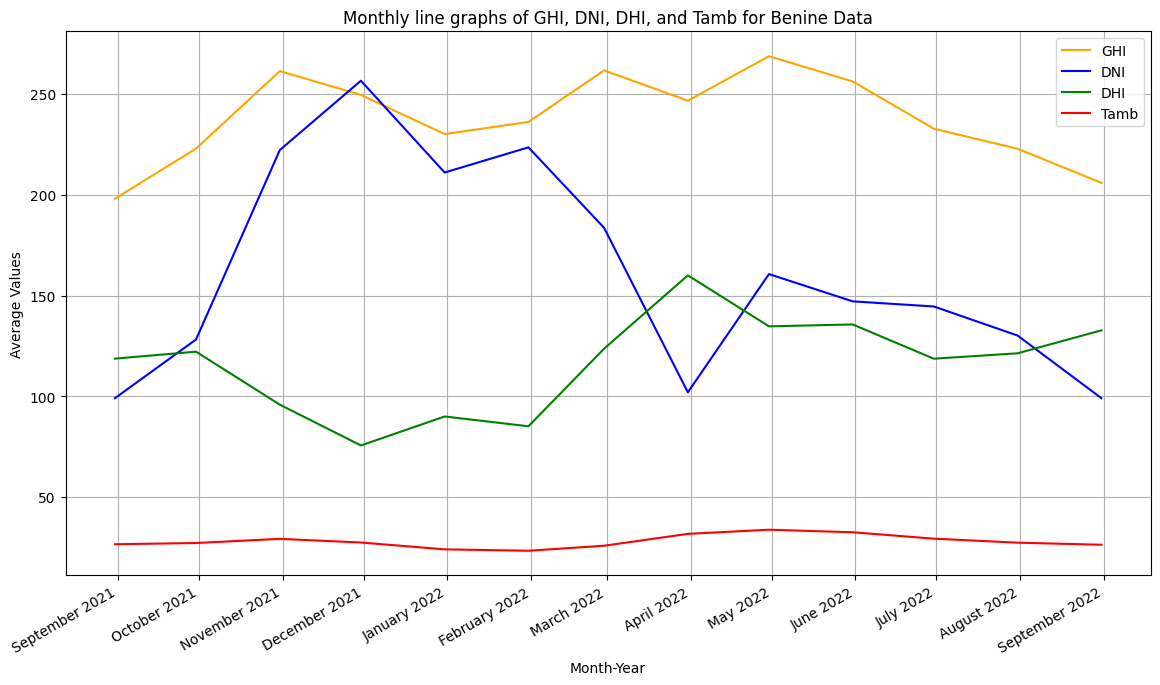

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\1211700551.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


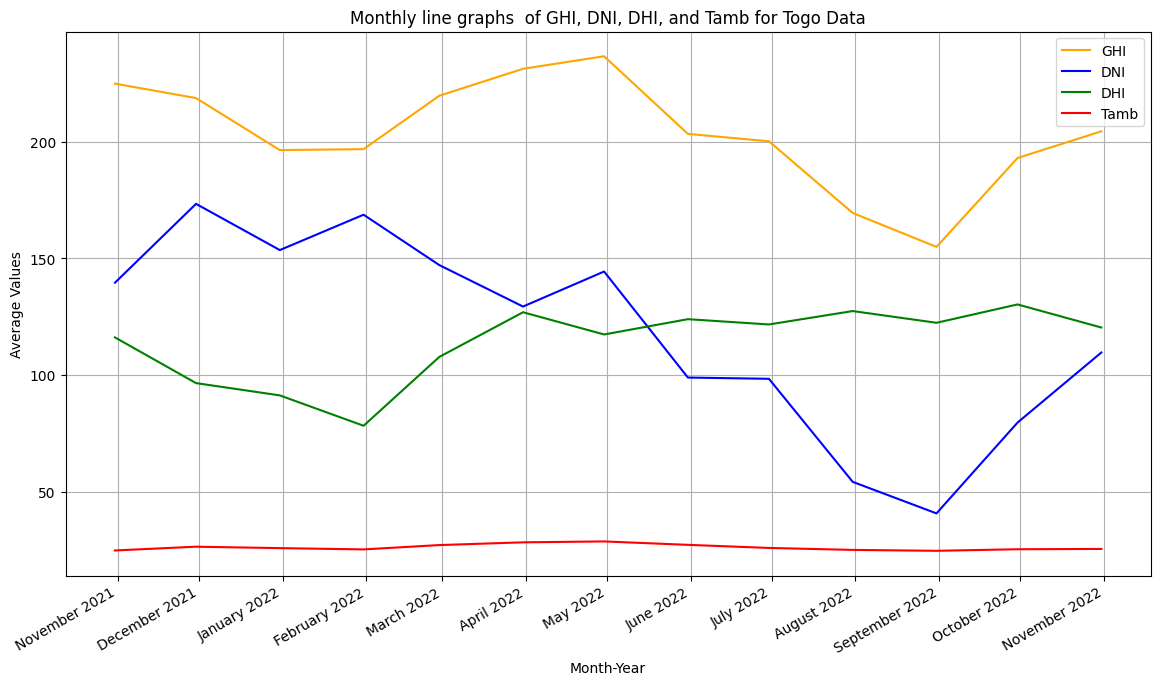

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\1211700551.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df.resample('M').mean()


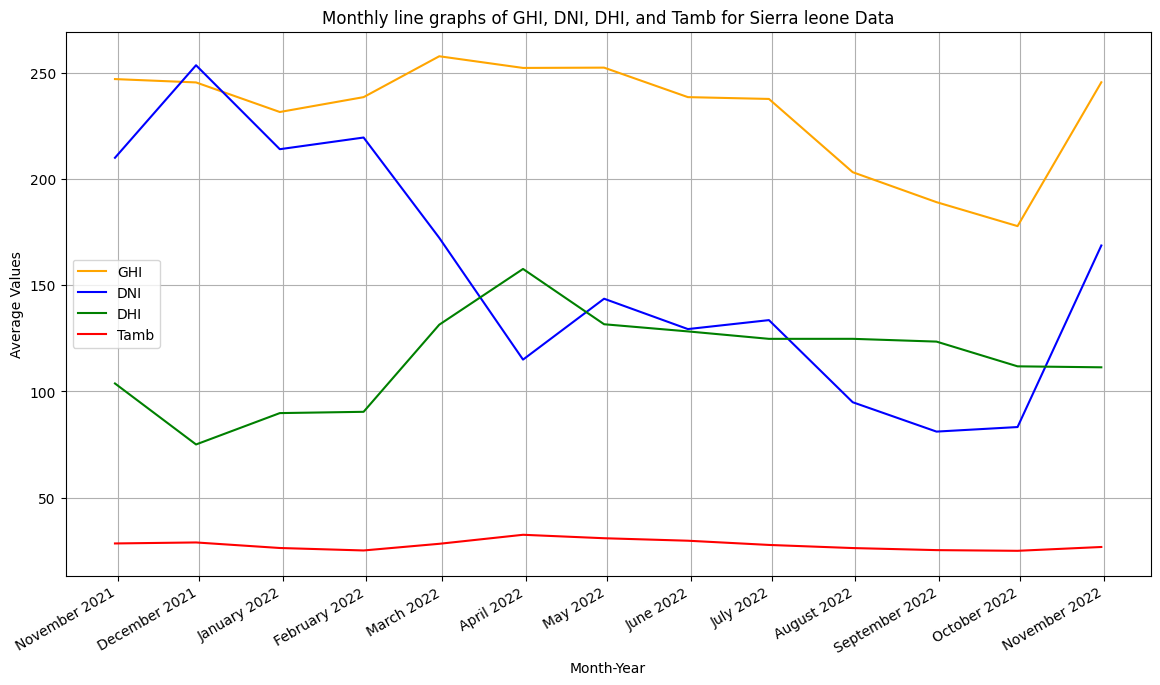

In [58]:


def plot_monthly_line_plots(df, timestamp_col='Timestamp', ghi_col='GHI', dni_col='DNI', dhi_col='DHI', tamb_col='Tamb', start_date=None, end_date=None, title="Monthly Line Plot of GHI, DNI, DHI, and Tamb"):
    """
    Plots line graphs for GHI, DNI, DHI, and Tamb columns, showing patterns by month.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    timestamp_col (str): Name of the column containing the timestamps.
    ghi_col (str): Name of the column for GHI values. Default is 'GHI'.
    dni_col (str): Name of the column for DNI values. Default is 'DNI'.
    dhi_col (str): Name of the column for DHI values. Default is 'DHI'.
    tamb_col (str): Name of the column for Tamb values. Default is 'Tamb'.
    start_date (str): Start date for the plot. Default is None.
    end_date (str): End date for the plot Default is None.
    """

    # Ensure the Timestamp column is a datetime type and set it as the index
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
    df.set_index(timestamp_col, inplace=True)

    # Filter the dataframe by the specified date range
    if start_date and end_date:
        df = df.loc[start_date:end_date]

    # Convert numeric columns to float, forcing errors to NaN
    df[ghi_col] = pd.to_numeric(df[ghi_col], errors='coerce')
    df[dni_col] = pd.to_numeric(df[dni_col], errors='coerce')
    df[dhi_col] = pd.to_numeric(df[dhi_col], errors='coerce')
    df[tamb_col] = pd.to_numeric(df[tamb_col], errors='coerce')

    # Resample the DataFrame to get monthly averages
    df_monthly_avg = df.resample('M').mean()

    # Plot line graphs for GHI, DNI, DHI, and Tamb
    plt.figure(figsize=(14, 8))

    # Line plots for each variable
    plt.plot(df_monthly_avg.index, df_monthly_avg[ghi_col], label='GHI', color='orange')
    plt.plot(df_monthly_avg.index, df_monthly_avg[dni_col], label='DNI', color='blue')
    plt.plot(df_monthly_avg.index, df_monthly_avg[dhi_col], label='DHI', color='green')
    plt.plot(df_monthly_avg.index, df_monthly_avg[tamb_col], label='Tamb', color='red')

    # Format the x-axis to show month and year format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Rotate and align the x labels for better readability
    plt.gcf().autofmt_xdate()

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month-Year')
    plt.ylabel('Average Values')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot the monthly line graph for each data:
benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)

plot_monthly_line_plots(df_benin, title="Monthly line graphs of GHI, DNI, DHI, and Tamb for Benine Data")
print("\n")
plot_monthly_line_plots(df_togo, title="Monthly line graphs  of GHI, DNI, DHI, and Tamb for Togo Data")
print("\n")
plot_monthly_line_plots(df_sierraleone, title="Monthly line graphs of GHI, DNI, DHI, and Tamb for Sierra leone Data")


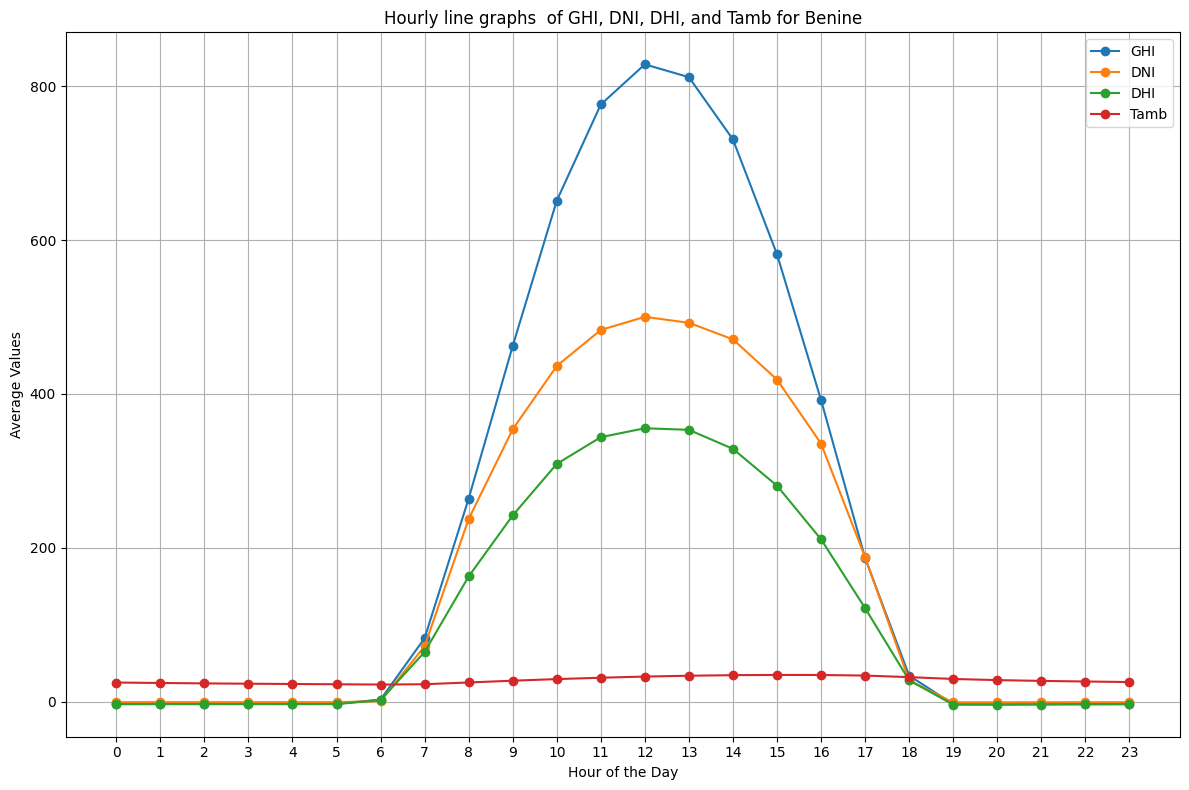

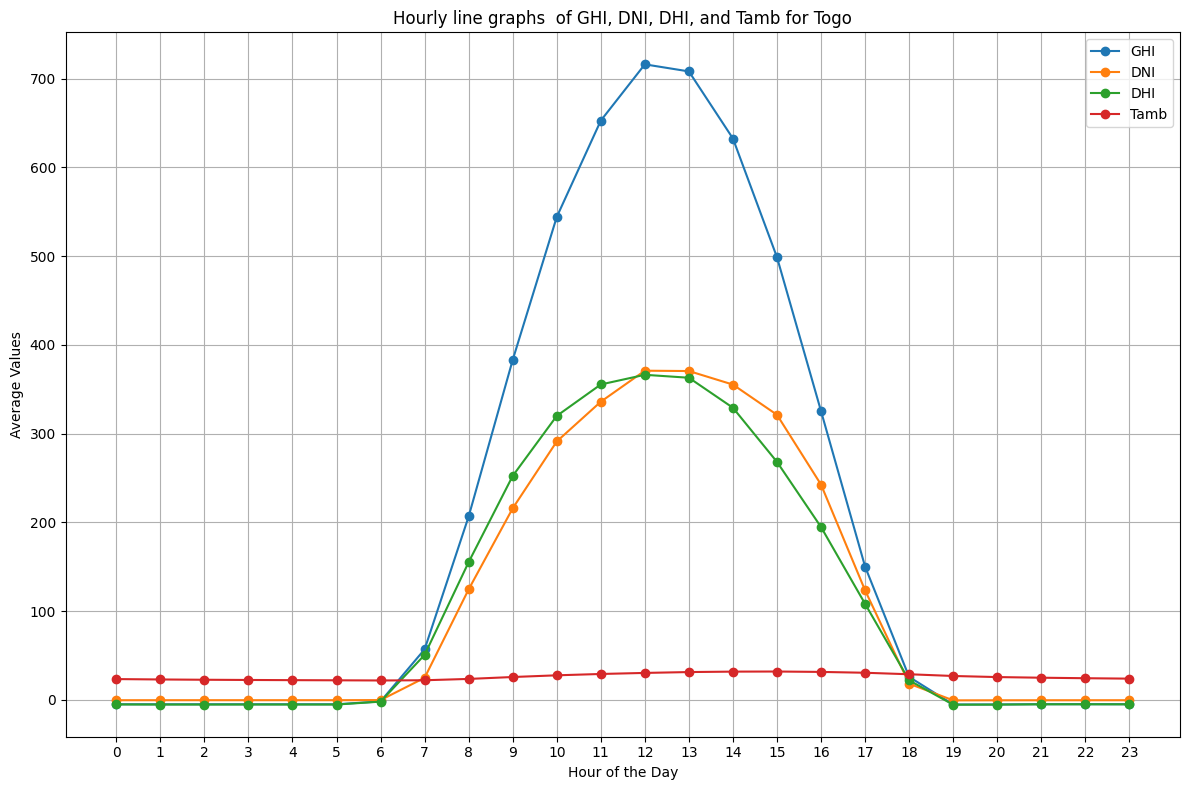

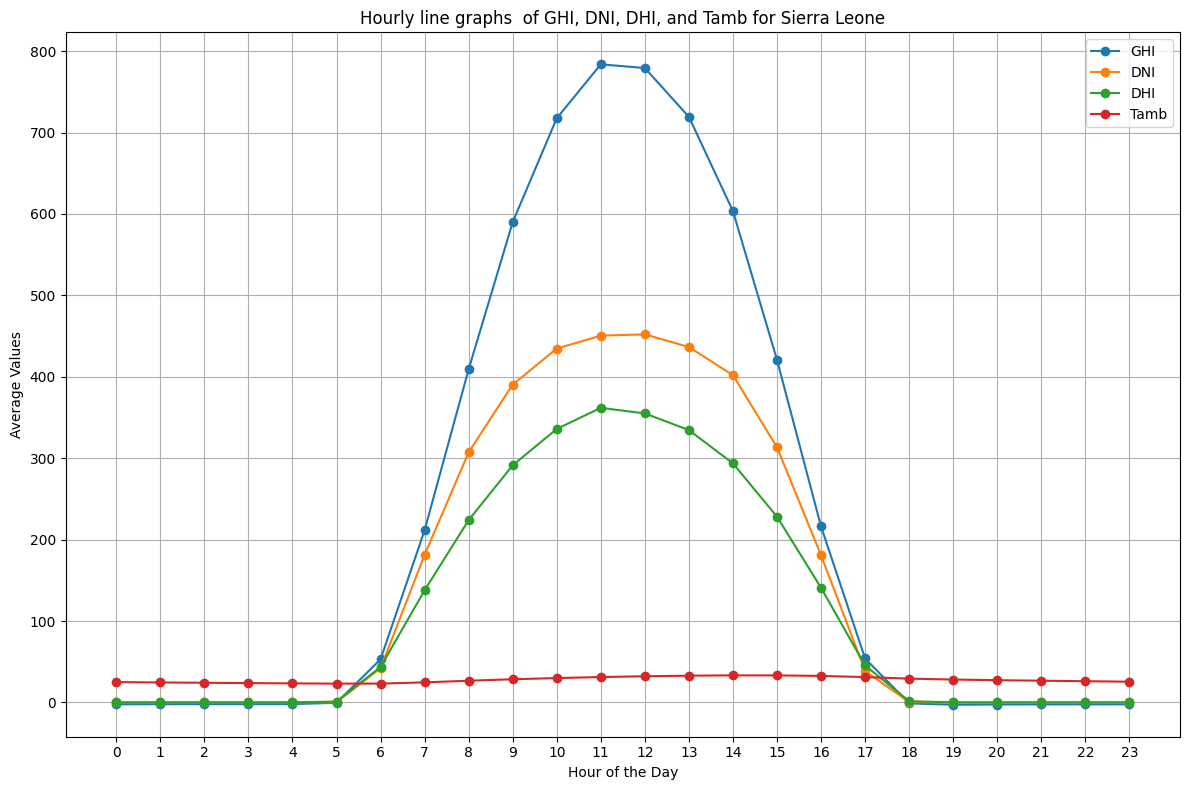

In [61]:


def plot_hourly_averages(df,title):
    

    # Convert the 'Timestamp' column to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Extract the hour from the Timestamp
    df['Hour'] = df['Timestamp'].dt.hour

    # Group by the hour and calculate the mean for each hour
    hourly_avg = df.groupby('Hour').mean().reset_index()

    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(hourly_avg['Hour'], hourly_avg['GHI'], label='GHI', marker='o')
    plt.plot(hourly_avg['Hour'], hourly_avg['DNI'], label='DNI', marker='o')
    plt.plot(hourly_avg['Hour'], hourly_avg['DHI'], label='DHI', marker='o')
    plt.plot(hourly_avg['Hour'], hourly_avg['Tamb'], label='Tamb', marker='o')

    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(hourly_avg['Hour'])
    plt.tight_layout()
    plt.show()

benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)


plot_hourly_averages(df_benin,title="Hourly line graphs  of GHI, DNI, DHI, and Tamb for Benine")
print("\n")
plot_hourly_averages(df_togo,title="Hourly line graphs  of GHI, DNI, DHI, and Tamb for Togo")
print("\n")
plot_hourly_averages(df_sierraleone,title="Hourly line graphs  of GHI, DNI, DHI, and Tamb for Sierra Leone")
print("\n")


Evaluation the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


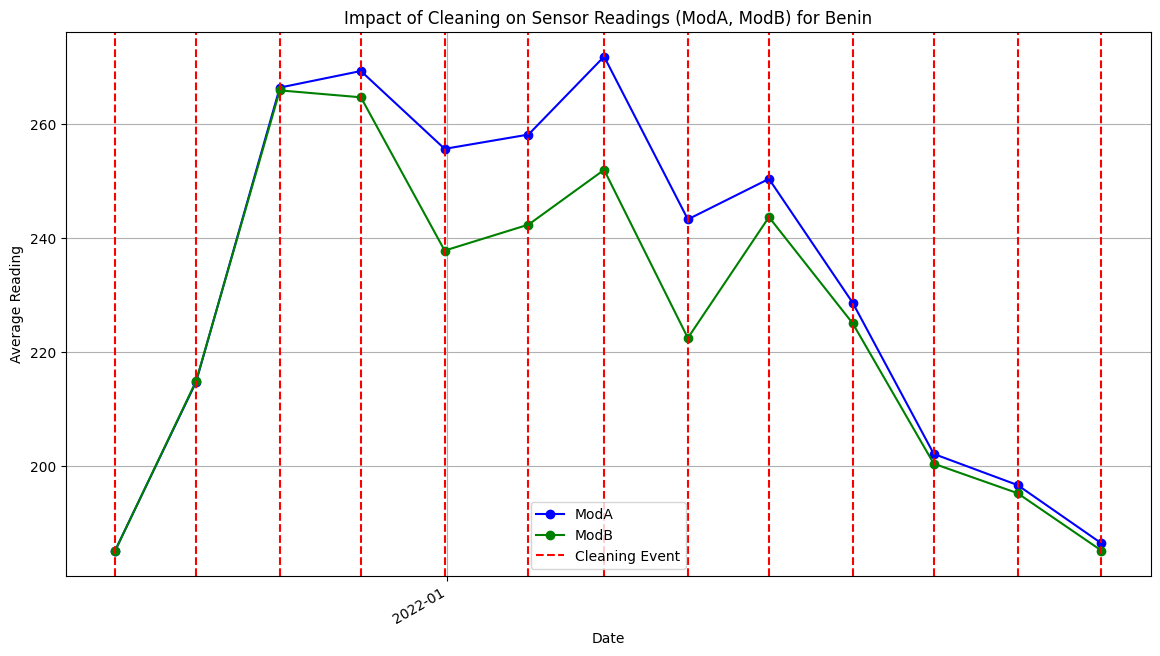

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


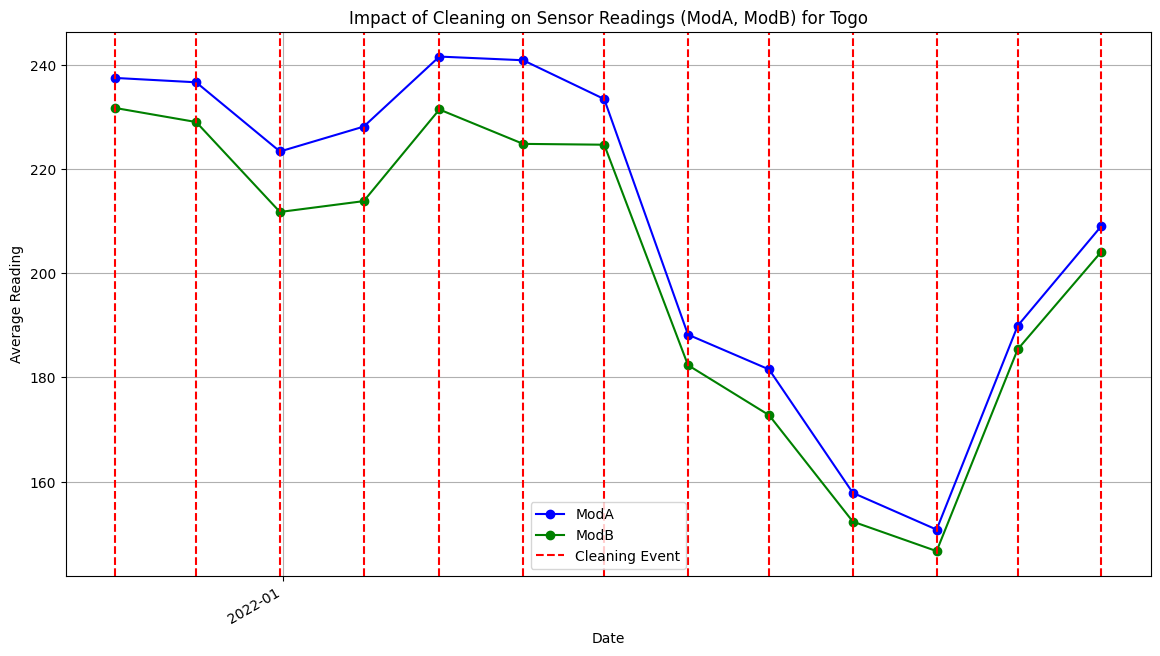

C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()
C:\Users\Ted\AppData\Local\Temp\ipykernel_14880\2654853177.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaning_monthly = df.resample('M')[cleaning_col].sum()


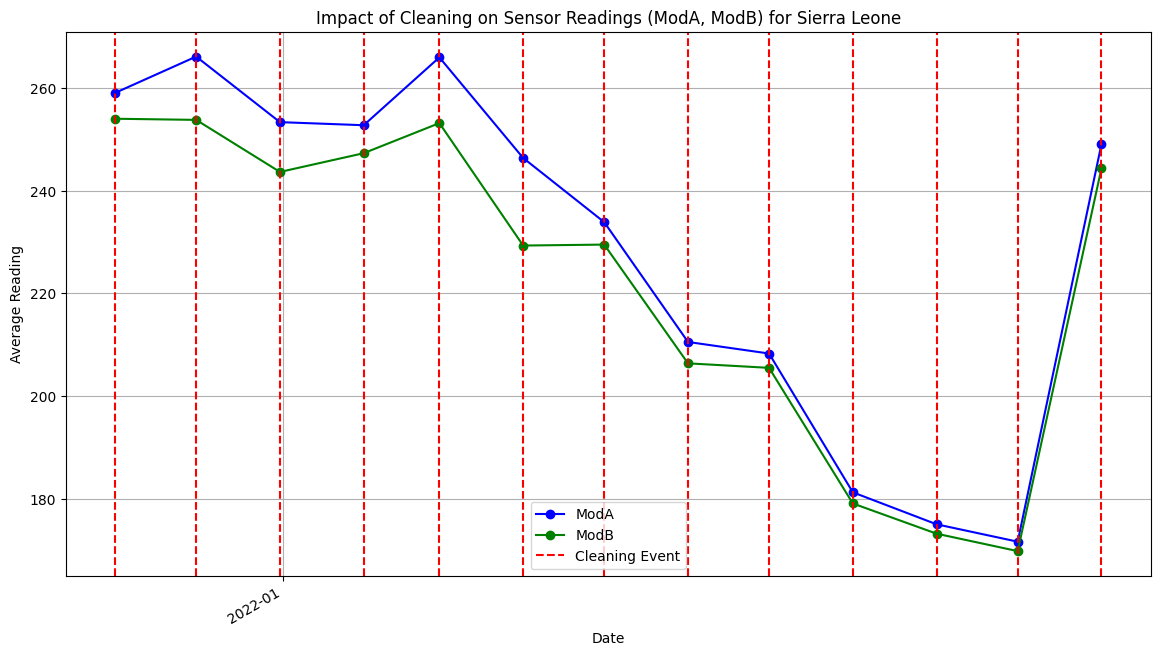

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def evaluate_cleaning_impact_monthly(df, cleaning_col='Cleaning', modA_col='ModA', modB_col='ModB', timestamp_col='Timestamp', title="Impact of Cleaning on Sensor Readings (ModA, ModB)"):
    """
    Evaluates the impact of cleaning on sensor readings (ModA, ModB) over time using monthly averages.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data with Timestamp as a column.
    cleaning_col (str): Name of the column indicating cleaning events.
    modA_col (str): Name of the column for ModA sensor readings.
    modB_col (str): Name of the column for ModB sensor readings.
    timestamp_col (str): Name of the column containing the timestamp.
    """
    
    # Convert the 'Timestamp' column to datetime and set as index
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
    df.set_index(timestamp_col, inplace=True)
    
    # Convert numeric columns to float, forcing errors to NaN
    df[modA_col] = pd.to_numeric(df[modA_col], errors='coerce')
    df[modB_col] = pd.to_numeric(df[modB_col], errors='coerce')

    # Create a binary column to indicate whether cleaning occurred (1) or not (0)
    df[cleaning_col] = df[cleaning_col].fillna(0).astype(int)

    # Resample the data to monthly frequency and calculate mean values for ModA and ModB
    df_monthly = df.resample('M').mean()

    # Create a Series to record cleaning events for each month
    cleaning_monthly = df.resample('M')[cleaning_col].sum()

    # Plot ModA and ModB readings over time with cleaning events
    plt.figure(figsize=(14, 8))

    # Plot ModA and ModB sensor readings
    plt.plot(df_monthly.index, df_monthly[modA_col], label='ModA', color='blue', linestyle='-', marker='o')
    plt.plot(df_monthly.index, df_monthly[modB_col], label='ModB', color='green', linestyle='-', marker='o')

    # Highlight cleaning events with vertical lines
    for date, cleaning_count in cleaning_monthly.items():
        if cleaning_count > 0:  # If cleaning events occurred in that month
            plt.axvline(x=date, color='red', linestyle='--', 
                        label='Cleaning Event' if 'Cleaning Event' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Format the x-axis to show year and month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Rotate and align the x labels for better readability
    plt.gcf().autofmt_xdate()

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Average Reading')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

benin_file_path = '../data/benin-malanville.csv'
df_benin = pd.read_csv(benin_file_path)

togo_file_path = '../data/sierraleone-bumbuna.csv'
df_togo = pd.read_csv(togo_file_path)

sierraleone_file_path = '../data/togo-dapaong_qc.csv'
df_sierraleone = pd.read_csv(sierraleone_file_path)

evaluate_cleaning_impact_monthly(df_benin, title="Impact of Cleaning on Sensor Readings (ModA, ModB) for Benin")
print("\n")
evaluate_cleaning_impact_monthly(df_togo, title="Impact of Cleaning on Sensor Readings (ModA, ModB) for Togo")
print("\n")
evaluate_cleaning_impact_monthly(df_sierraleone, title="Impact of Cleaning on Sensor Readings (ModA, ModB) for Sierra Leone")
print("\n")